[Reference](https://github.com/bonheurgirl/Marketing-Analytics-Python/blob/main/How%20to%20use%20correlation%20analysis%20to%20improve%20marketing%20performance.ipynb)

# Import Packages

In [1]:
#Locate imported packages
import sys
sys.path

#import pandas and numpy
import pandas as pd
import numpy as np

# From matplotlib, import pyplot under the alias plt
from matplotlib import pyplot as plt

#Import Seaborn
import seaborn as sns

#Import statsmodels ols function
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Import & Inspect Dataset


In [2]:
#Import data
df = pd.read_csv("https://raw.githubusercontent.com/Branden-Kang/Python-practice/master/Data/mktmix.csv")

print(df.head(5))

   NewVolSales  Base_Price  Radio   InStore NewspaperInserts  Discount  \
0        19564   15.029276   245.0   15.452              NaN     0.000   
1        19387   15.029276   314.0   16.388              NaN     0.000   
2        23889   14.585093   324.0   62.692              NaN     0.050   
3        20055   15.332887   298.0   16.573              NaN     0.000   
4        20064   15.642632   279.0   41.504              NaN     0.045   

           TV    Stout Website_Campaign   
0  101.780000  2.28342               NaN  
1   76.734000  2.22134               NaN  
2  131.590200  2.00604               NaN  
3  119.627060  2.19897               NaN  
4  103.438118  1.81860               NaN  


In [3]:
# Check column data types and check for non-missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NewVolSales        104 non-null    int64  
 1   Base_Price         104 non-null    float64
 2   Radio              100 non-null    float64
 3   InStore            104 non-null    float64
 4   NewspaperInserts   6 non-null      object 
 5   Discount           104 non-null    float64
 6   TV                 104 non-null    float64
 7   Stout              104 non-null    float64
 8   Website_Campaign   14 non-null     object 
dtypes: float64(6), int64(1), object(2)
memory usage: 7.4+ KB
None


In [4]:
# Check Summary statistics
print(df.describe())

        NewVolSales  Base_Price      Radio      InStore    Discount  \
count    104.000000  104.000000  100.000000  104.000000  104.000000   
mean   20171.067308   15.306740  256.690000   32.918567    0.022059   
std     1578.604670    0.528902   86.994682   13.682570    0.027668   
min    17431.000000   13.735724    0.000000   10.782000    0.000000   
25%    19048.750000   15.029276  235.000000   22.183750    0.000000   
50%    19943.500000   15.332887  278.500000   31.161500    0.000000   
75%    20942.750000   15.642632  313.250000   41.079000    0.049423   
max    24944.000000   16.281020  399.000000   68.119000    0.090763   

               TV       Stout  
count  104.000000  104.000000  
mean   141.009774    2.545966  
std     42.949231    0.310070  
min     37.656174    1.818600  
25%    117.108343    2.316450  
50%    138.581542    2.502120  
75%    175.681780    2.814315  
max    240.291967    3.158620  


In [5]:
#display all column names of DataFrame - check were imported correctly
print(df.columns.tolist())

['NewVolSales', 'Base_Price', 'Radio ', 'InStore', 'NewspaperInserts', 'Discount', 'TV', 'Stout', 'Website_Campaign ']


In [6]:
# remove extra whitespace
df.columns = df.columns.str.replace(' ', '')

In [7]:
#Let's print the results of the removal
print(df.columns.tolist())

['NewVolSales', 'Base_Price', 'Radio', 'InStore', 'NewspaperInserts', 'Discount', 'TV', 'Stout', 'Website_Campaign']


# Imputation of missing values

In [8]:
# filling missing value using fillna(). We will impute with zero to keep it simple, but not something I would normally do.
df = df.fillna(0)

# Exploratory Data Analysis & Visualization

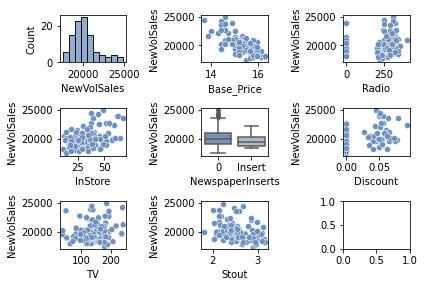

In [9]:
# Set the color palette
sns.set_palette(sns.color_palette("vlag"))

#Initialize subplots with number of rows and number of columns
figure, ax = plt.subplots(nrows = 3, ncols = 3)

#See the distribution of the data
sns.histplot(data=df, x="NewVolSales", bins=10, ax=ax[0,0])
sns.scatterplot(data=df, x="Base_Price", y="NewVolSales", ax=ax[0,1])
sns.scatterplot(data=df, x="Radio", y="NewVolSales", ax=ax[0,2])
sns.scatterplot(data=df, x="InStore", y="NewVolSales", ax=ax[1,0])
sns.boxplot(data=df, x="NewspaperInserts", y="NewVolSales", ax=ax[1,1])
sns.scatterplot(data=df, x="Discount", y="NewVolSales", ax=ax[1,2])
sns.scatterplot(data=df, x="TV", y="NewVolSales", hue="NewspaperInserts", legend = False, ax=ax[2,0])
sns.scatterplot(data=df, x="Stout", y="NewVolSales", ax=ax[2,1])
#sns.boxplot(data=df, x="Website_Campaign", y="NewVolSales", ax=ax[2,2].tick_params(axis='x', rotation=45))

#Gives a tidy layout
plt.tight_layout()

#Save plot
plt.savefig('EDA.png', bbox_inches='tight')

#Show plot
plt.show()

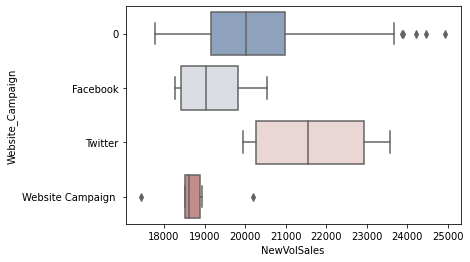

In [10]:
#Horizontal boxplot must flip the x and y variable
sns.boxplot(data=df, x="NewVolSales", y="Website_Campaign", orient="h", palette="vlag")

#Save plot
plt.savefig('Website_Camp.png', bbox_inches='tight')

#Show plot
plt.show()

# Correlation Analysis

In [11]:
#Correlation Matrix
corr = df.corr(method = "pearson")
print(corr)

             NewVolSales  Base_Price     Radio   InStore  Discount        TV  \
NewVolSales     1.000000   -0.729258  0.116513  0.441627  0.424761  0.145308   
Base_Price     -0.729258    1.000000 -0.109777 -0.230751 -0.189975  0.065872   
Radio           0.116513   -0.109777  1.000000 -0.095449 -0.019473 -0.097410   
InStore         0.441627   -0.230751 -0.095449  1.000000  0.719376 -0.015759   
Discount        0.424761   -0.189975 -0.019473  0.719376  1.000000  0.115074   
TV              0.145308    0.065872 -0.097410 -0.015759  0.115074  1.000000   
Stout          -0.375905   -0.027607 -0.209548  0.025108 -0.025555 -0.126546   

                Stout  
NewVolSales -0.375905  
Base_Price  -0.027607  
Radio       -0.209548  
InStore      0.025108  
Discount    -0.025555  
TV          -0.126546  
Stout        1.000000  


In [12]:
corr.style.background_gradient(cmap='RdBu')

,NewVolSales,Base_Price,Radio,InStore,Discount,TV,Stout
NewVolSales,1.000000,-0.729258,0.116513,0.441627,0.424761,0.145308,-0.375905
Base_Price,-0.729258,1.000000,-0.109777,-0.230751,-0.189975,0.065872,-0.027607
Radio,0.116513,-0.109777,1.000000,-0.095449,-0.019473,-0.097410,-0.209548
InStore,0.441627,-0.230751,-0.095449,1.000000,0.719376,-0.015759,0.025108
Discount,0.424761,-0.189975,-0.019473,0.719376,1.000000,0.115074,-0.025555
TV,0.145308,0.065872,-0.097410,-0.015759,0.115074,1.000000,-0.126546
Stout,-0.375905,-0.027607,-0.209548,0.025108,-0.025555,-0.126546,1.000000


# How are correlation and regression related?

In [13]:
corr_coeff = round(df['NewVolSales'].corr(df['Discount']),2)
corr_coeff_sq = round(df['NewVolSales'].corr(df['Discount'])**2,2)

print("The correlation coefficient for NewVol Sales and Discount is {}. When we square this we get {}, the correlation coefficient squared.".format(corr_coeff, corr_coeff_sq))

The correlation coefficient for NewVol Sales and Discount is 0.42. When we square this we get 0.18, the correlation coefficient squared.


In [14]:
# Create the model object
sales_vs_discount = ols("NewVolSales ~ Discount", data=df)

# Fit the model
sales_vs_discount = sales_vs_discount.fit()
 
# Print summary table of model fit
print(sales_vs_discount.summary())

                            OLS Regression Results                            
Dep. Variable:            NewVolSales   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     22.45
Date:                Thu, 30 Jun 2022   Prob (F-statistic):           6.99e-06
Time:                        13:49:23   Log-Likelihood:                -902.61
No. Observations:                 104   AIC:                             1809.
Df Residuals:                     102   BIC:                             1815.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.964e+04    180.439    108.826      0.0

# Marketing Mix Modeling

In [15]:
# Create the model object
mkmix_model = ols("NewVolSales ~ Base_Price + Radio + InStore + NewspaperInserts + Discount + TV + Stout + Website_Campaign", data=df)

# Fit the model
mkmix_model = mkmix_model.fit()

# Print the summary of the fitted model
print(mkmix_model.summary())

                            OLS Regression Results                            
Dep. Variable:            NewVolSales   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     46.63
Date:                Thu, 30 Jun 2022   Prob (F-statistic):           6.91e-32
Time:                        13:49:35   Log-Likelihood:                -819.66
No. Observations:                 104   AIC:                             1661.
Df Residuals:                      93   BIC:                             1690.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------